# What are the most demanded skills for the top 3 most popular data roles?

Methodology

1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

In [1]:
 # Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading Data 
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Set Universal Theme
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

c:\Users\PC-USER\anaconda3\envs\wcourse\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_us = df[df['job_country'] == 'United States']

In [10]:
df_skills = df_us.explode('job_skills')

df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [20]:
job_titles = df_skills_count['job_title_short'].unique().tolist()   # Unique returns and array so we have to change it to a list.

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [28]:
df_job_total = df_us['job_title_short'].value_counts().reset_index(name='job_total') # Getting the number of all the diff jobs

In [35]:
df_skills_percent = pd.merge(df_skills_count, df_job_total, how='left', on='job_title_short')  # how= 'left' specifies that all rows from the left DataFrame will be included in the resulting merged df, even if there are no corresponding rows in the right df.

df_skills_percent['skill_percent'] = 100 * df_skills_percent['skill_count'] / df_skills_percent['job_total']

df_skills_percent

,job_skills,job_title_short,skill_count,job_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


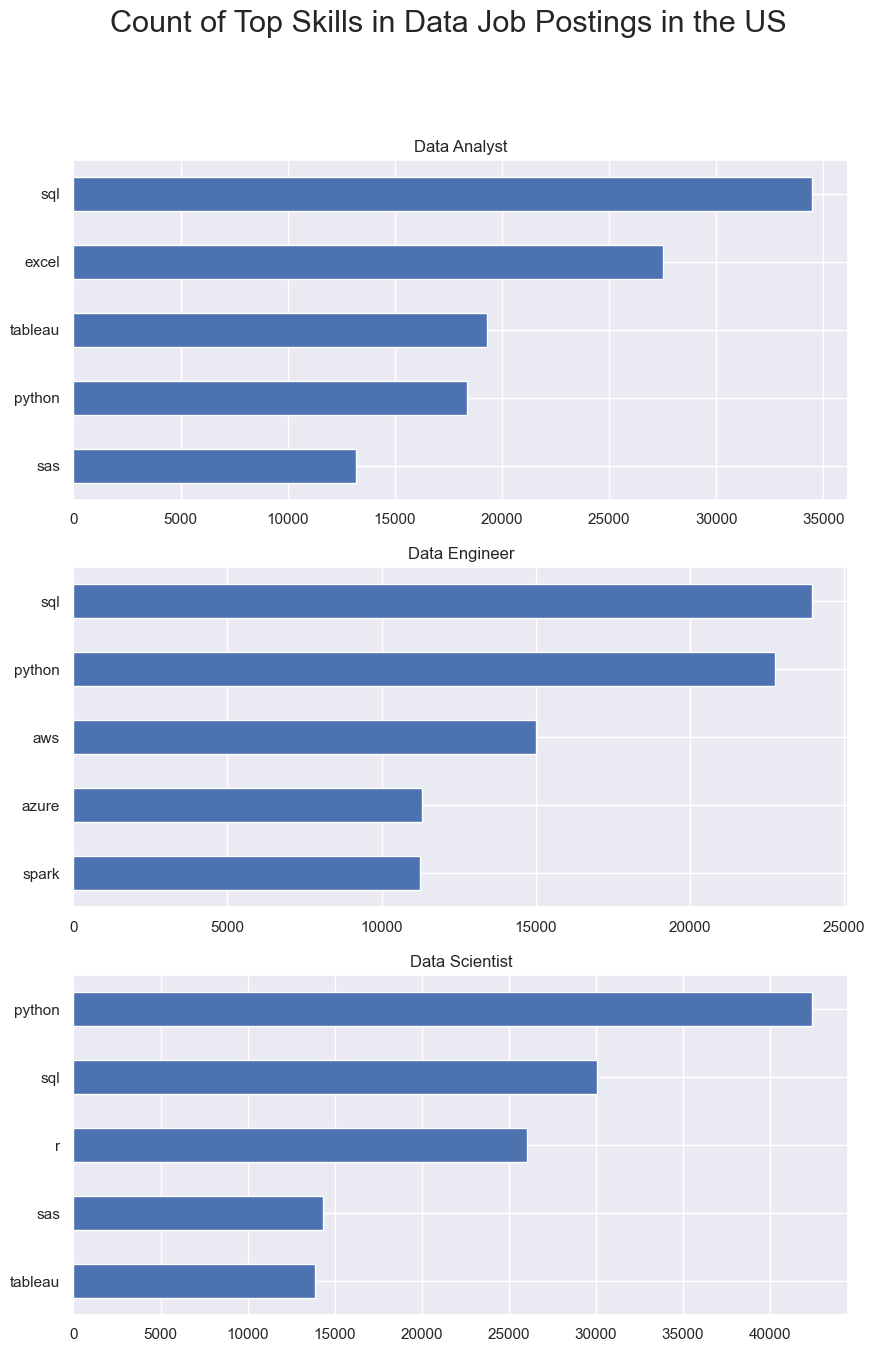

In [46]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, job_title in enumerate(job_titles):
  df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
  df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=axes[i], title=job_title)
  axes[i].invert_yaxis() 
  axes[i].set_ylabel('') 
  axes[i].legend().set_visible(False)

fig.suptitle('Count of Top Skills in Data Job Postings in the US', fontsize=22)
#fig.tight_layout(h_pad=2)
plt.show()

Building a percent chart

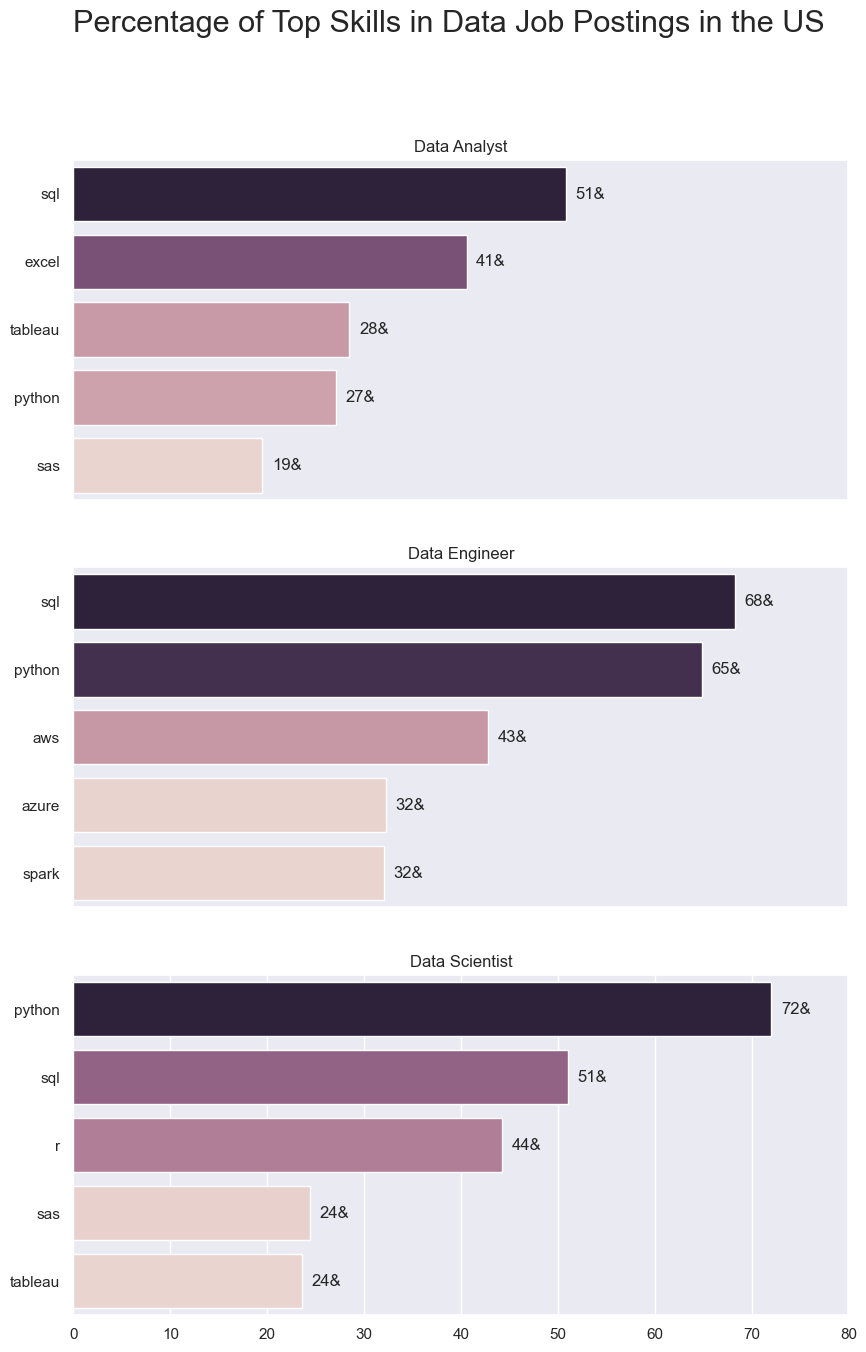

In [66]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, job_title in enumerate(job_titles):
  df_plt = df_skills_percent[df_skills_percent['job_title_short'] == job_title].head(5)
  #df_plt.plot(kind='barh', x='job_skills', y='skill_percent', ax=axes[i], title=job_title)
  sns.barplot(data=df_plt, x='skill_percent', y='job_skills', ax=axes[i], hue='skill_count')
  axes[i].set_title(job_title)
  #axes[i].invert_yaxis() 
  axes[i].set_ylabel('')
  axes[i].set_xlabel('')
  axes[i].legend().set_visible(False)
  axes[i].set_xlim(0, 80)

  # using the .text function to input the percentage figures right inside the gragh
  for n, v in enumerate(df_plt['skill_percent']):  # n for index and v for value
    axes[i].text(v + 1, n, f'{v:.0f}&', va='center') # +1 gives a space between the bar and the number.

  # Now to remove the xticks for all but the last plot
  if i != len(job_titles) -1: # Identify the position of the plot
    axes[i].set_xticks([]) # Setting to an empty list leaves the xticks empty


fig.suptitle('Percentage of Top Skills in Data Job Postings in the US', fontsize=22)
#fig.tight_layout(h_pad=2)
plt.show()